# 6.1: Boosting as greedy function pproximation

In this short notebook we discuss the concept of boosting (otherwise known as *greedy function approximation*), a popular approach to both nonlinear regression and classification problems.  As an alternative to kernel and neural network function approximators, boosting is particular useful for datasets consisting of meta-data and / or [categorical variables](https://github.com/jermwatt/mlrefined/blob/master/4.1%20%20Handling%20categorical%20features%20.ipynb).  

These notes are part of the supplementary material to the textbook Machine Learning Refined (Cambridge University Press, 2016). Visit http://www.mlrefined.com for free chapter downloads and tutorials, and [our Amazon site here](https://www.amazon.com/Machine-Learning-Refined-Foundations-Applications/dp/1107123526/ref=sr_1_1?ie=UTF8&qid=1474491657&sr=8-1&keywords=machine+learning+refined) for details regarding a hard copy of the text.

In [18]:
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import numpy as np
import pandas as pd
from ipywidgets import interact
from ipywidgets import widgets
import math
from sklearn import ensemble
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor

In [16]:
from Fit_Bases import Fit_Bases
dol = Fit_Bases()
dol.load_data('noisy_sin_sample.csv')

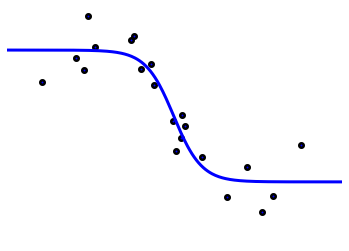

In [17]:
dol.browse_net_fit()

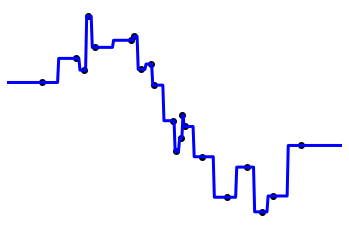

In [12]:
dol.browse_tree_fit()

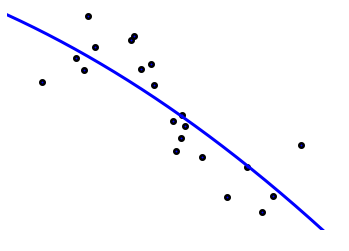

In [13]:
dol.browse_poly_fit()

## 1 The variety of bases used in machine learning

Boosting - like fixed basis kernels and neural networks - is an approach to performing nonlinear regression and classification based on the notion of *function approximation*.  As discussed in Chapters 5-7 of the book, remember that both regression and classification are reductions of this fundamental mathematical problem.  Thus from the function approximation perspective boosting differs from these two varients simply by its choice of basis.

### Fixed bases: pre-defined basis elements
Remember that a fixed basis kernel consists of elements like polynomials or sine waves, which have no internal parameters that need be tuned.  For example, the first few elements of the polynomial basis looks like 

$f_0(x) = 1$ 

$f_1(x) = x$ 

$f_2(x) = x^2$

$f_3(x) = x^3$


and so forth with the $m^th$ element taking the form $f_m(x) = x^m$.  Once again notice that the basis elements here have no internal parameters that require tuning.  The only parameter of a polynomial basis element - its *degree* - is defined by the element's index (e.g., $f_m(x)$ has degree parameteter = $n$).

In [1]:
from Draw_Bases import Draw_Bases
%matplotlib inline
bases = Draw_Bases()

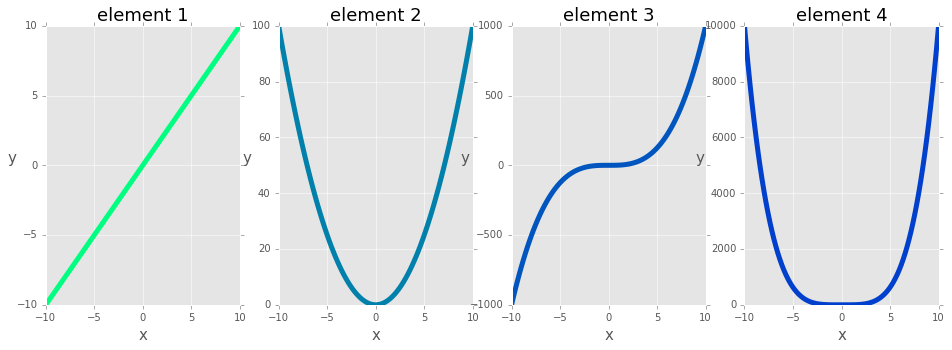

In [3]:
bases.show_1d_poly()

### Neural networks: compositionally defined basis elements
Neural network basis elements, on the other hand, do have internal parameters that must be tuned propertly to a given dataset.  This is because each element of such a basis consist of *compositions of parameterized functions*.  For example, the $m^th$ element of a single hidden layer neural network basis employing the max or 'rectified linear unit' activation function looks like


$f_m(x) = \text{max}(0, c_m + \mathbf{x}^T\mathbf{v}_m)$

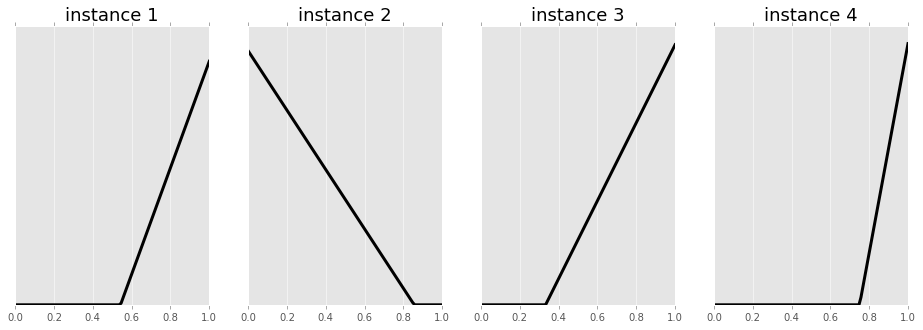

In [1]:
bases.show_1d_net(num_layers = 1)

Composing the activation function again with itself yeilds a neural network with two hidden layers (more specifically we take a linear combination of units that look like the basis element above, and then shove this through the same activation function), whose $m^{th}$ element takes the form

$f_m(x) = \text{max}(0,c_m^{(1)} + \sum_{m_2=1}^{M_2} \text{max}(0,c_{m_2}^{(2)} + \mathbf{x}^T\mathbf{v}_{m_2}^{(2)})v_{{m_2},{m}}^{(1)}$

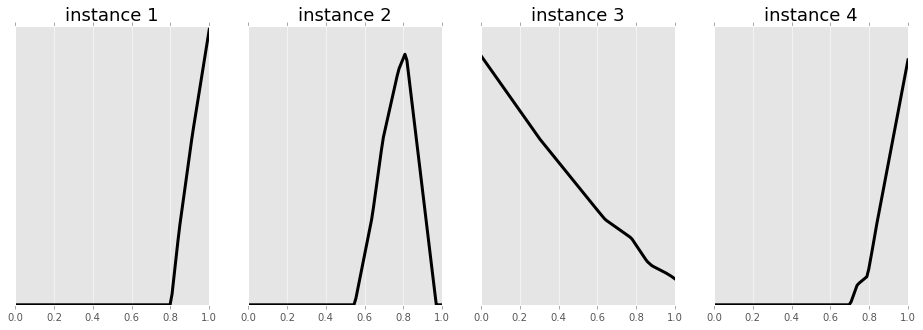

In [2]:
bases.show_1d_net(num_layers = 2)

And the more layers we add to a neural network basis, the more flexible each element becomes.  For example, if we plot instances of a network basis with 10 hidden layers we can see how they are much more flexible than 1 or 2 hidden layer elements.

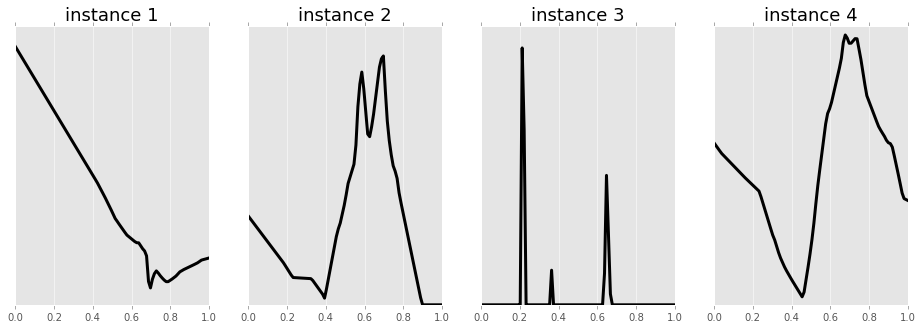

In [7]:
bases.show_1d_net(num_layers = 10)

### Decision Trees: recursively defined basis elements

Like neural networks, a single tree basis element can take on a wide array of shapes.  Also similar to neural nets, trees can have multiple layers (called the level of *depth*) and the more layers a tree basis element has the wider the array of shapes it can take.  

These 'layers' come not from composing functions together, but by creating flexible functions via a *recursive* process.  Additionally, trees are highly discontinuous and are typically constructed along individual dimensions of a feature space (unlike neural nets, which are tuned along all dimensions of a feature space simultaneously). 

The simplest sort of tree basis consists of indicator functions or, as they are more commonly referred to, *stumps* whose break lies along a single dimension of the feature space.  These are simple step functions whose top and bottom steps break along a single dimension.  

A stump with 1-dimensional input $x$ can be written as 

REPLACE WITH NICER FORMULA IMG

$ \
f_{m}\left(x\right)=\begin{cases}
y_{1} & \,\,x>v\\
y_{2} & \,\,x\leq v
\end{cases}
\
$

where $v$ is split point at which the stump changes values, and $y_{1}$ and $y_{2}$ are values taken by the two sides of the stump, respectively, which we refer to as *levels* of the stump.

In the python cell that follows we plot four instances of such a stump basis element.

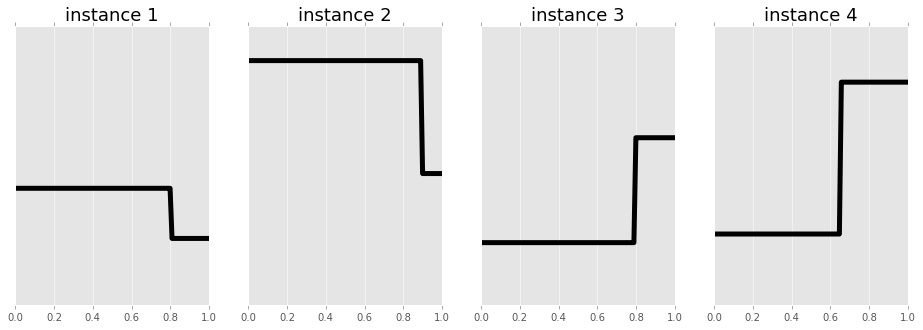

In [6]:
bases.show_1d_tree(depth = 1)

To create a more flexible decision tree basis function we split each level of the stump.  This gives us a *tree* of depth 2 (our first split gave us a stump, another phrase for stump is tree of depth 1).  

Mathematically we write the form of a tree basis element of depth 2 as 

IMG OF TREE DEPTH = 2 EQUATION GOES HERE

This gives a basis element with four (potentially) distinct levels.  Since the location of the splits and the values of the levels can be set in many ways, this gives each element of a tree basis of depth 2 a good deal more flexibility than stumps. 

In the next python cell we plot

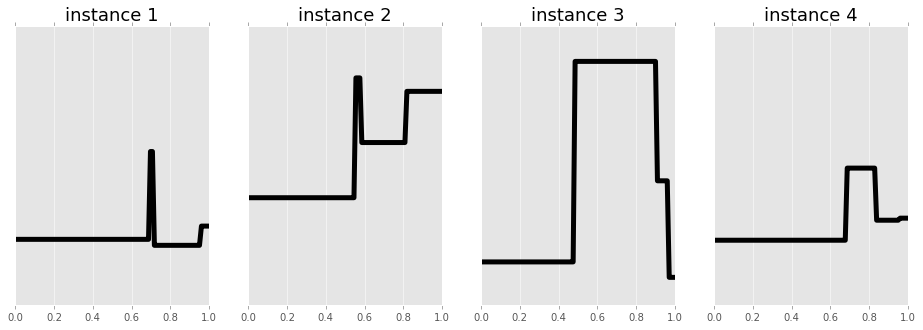

In [5]:
bases.show_1d_tree(depth = 2)

To make an even more flexible basis elements we simply split the levels of a given tree basis element.   

This gives decision tree elements a distinctly recursive structure: to create a depth (d+1) tree basis element we simply split each level of a basis element of depth d.

This gives a single decision tree element of high depth a great amount of flexibility.  In the next python cell we show 4 instances of a tree basis element with depth = 5.

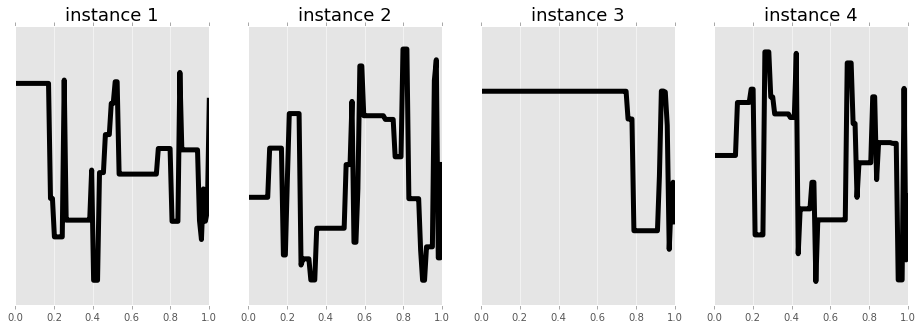

In [6]:
bases.show_1d_tree(depth = 5)

### Summary
Each sort of basis - fixed, neural network, and boosting - are commonly employed in machine learning.  

- Each element of a fixed basis is a simple continuous function.  All basis elements are distinct in a fixed basis, with each element having its own unique shape.


- Each element of a neural net basis is a *composition* of simple continuous functions (and so is itself continuous).  All basis elements have the same compositional structure (and mathematical form), however this compositional structure allows each one to take on a wide array of different shapes.


- Each element of a tree basis is a *recursive combination* of simple discontinuous stump functions, with each stump acting on a single dimension of the feature space (since each tree consists of discontinuous stumps, it too is discontinuous).  All basis elements have the same recursive structure, however this recursive structure allows each one to take on a wide array of different shapes. 

### 2 Composition of bases elements
- compare compositions to nn and kernel on a continuous dataset, just to drive home the point that these are function approximators, and that in theory if we have complete information any basis can approximate
- conclude boosting as a 'greedy' function approximation approach, in the same framework as fixed and adjustable bases, where the 'greedy' part comes from how we tune the parameters


### 3  Better for discrete data

- harken back to chapters 6 and 7 - some bases are better for certain functions
- re-show examples from Reza's CVPR slides - when one basis is better than another

### 4  "Greedy" function approximation, or how to tune parameters of a sum of trees

- setup the same cost function with basis elements
- only now clearly we can't apply gradient descent - as the elements are discontinuous
- greedy algorithm instead

###  5.  Why is this ofen referred to as Gradient Boosting instead of just greedy function approximation?